# Loading the audio file

In [5]:
import librosa

audio_file = '../data/donald_trump.wav'
x, sr = librosa.load(audio_file)

## librosa.load() returns the following

- x : the audio file as a floating point time series
- sr : Sample rate of the audio

Audio will be automatically resampled to the default sample rate (sr=22050)

To preserve the native sampling rate of the file, use sr=None.

In [6]:
print(x.shape)
print(sr)

(1804490,)
22050


# Let's play the audio first 

In [14]:
import IPython.display as ipd
ipd.Audio(x, rate=sr)

# Plotting a Waveform

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

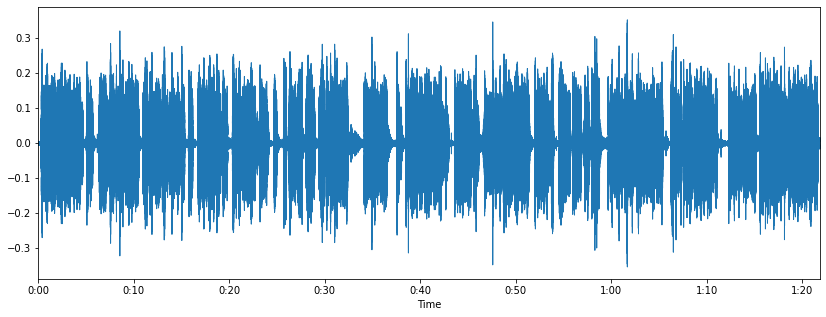

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Above is the plot of the entire audio, let's just trim the first 5 seconds-- roughly the first sentence

In [16]:
'''
since sampling rate defines the number of points you sample per second from the audio, 
we can get the first 5 seconds simply by fetching 5*sr points from the timeseries array of the entire audio
'''

x_first_sentence = x[0:int(5 * sr)]

In [17]:
# sanity check: let's listen to these 4 seconds

ipd.Audio(x_first_sentence, rate=sr)

## Plotting a waveform for the first sentence

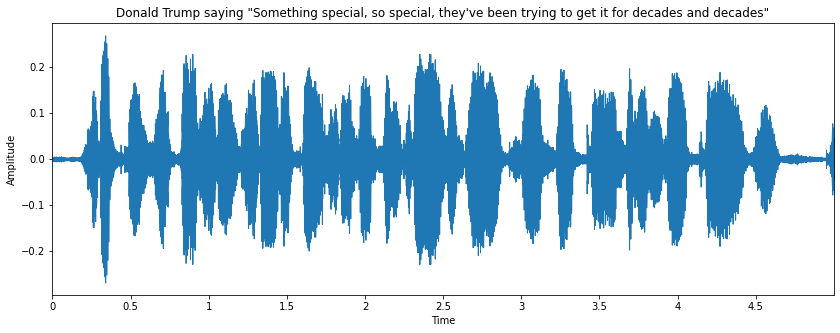

In [18]:
plt.figure(figsize=(14, 5))
plt.title('Donald Trump saying "Something special, so special, they\'ve been trying to get it for decades and decades"')
plt.ylabel('Amplitude')
librosa.display.waveplot(x_first_sentence, sr=sr)

# Applying a pre-emphasis filter 

In [20]:
x_filt = librosa.effects.preemphasis(x_first_sentence)

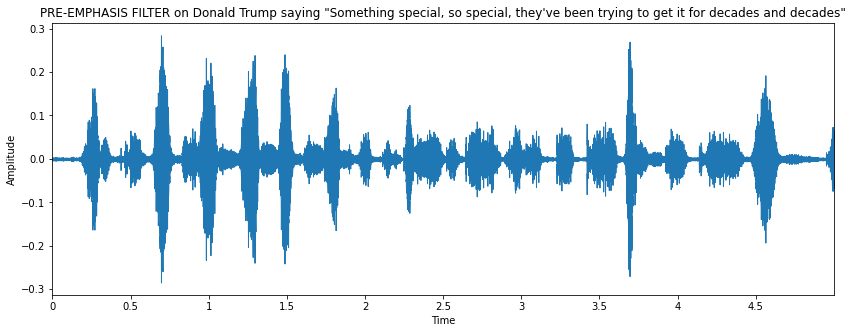

In [21]:
plt.figure(figsize=(14, 5))
plt.title('PRE-EMPHASIS FILTER on Donald Trump saying "Something special, so special, they\'ve been trying to get it for decades and decades"')
plt.ylabel('Amplitude')
librosa.display.waveplot(x_filt, sr=sr)

# Spectrogram

In [23]:
import numpy as np

In [24]:
S = np.abs(librosa.stft(x_filt))

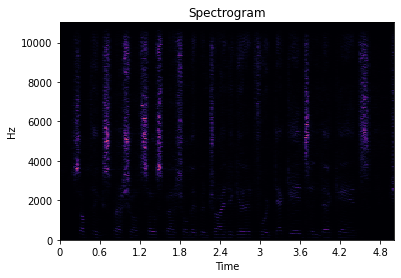

In [25]:
plt.title('Spectrogram')
librosa.display.specshow(S, x_axis='time', y_axis='hz')

# Log scaled Spectrogram

In [34]:
# plt.title('Log scaled Spectrogram')
# librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), x_axis='time', y_axis='log')

# Mel Spectrogram

In [29]:
# computing a mel-scaled spectrogram instead of the linear frequency bins appoach

S_mel = librosa.feature.melspectrogram(x_filt)

In [39]:
# converting power to decible units

S_mel_db = librosa.power_to_db(S_mel)

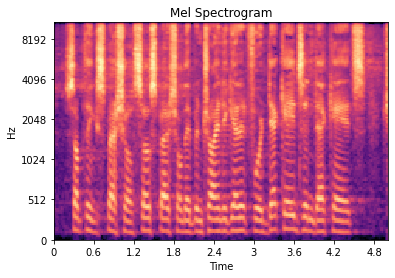

In [40]:
plt.title('Mel Spectrogram')
librosa.display.specshow(S_mel_db, x_axis='time', y_axis='mel')